## Exempel 3.4.1

Här ska vi udersöka om det finns en signifikan skillnad på värdena uppmätta av två experimetella tekniker över 10 batcher
<img src="img/tab3.1.png">


In [2]:
import pandas as pd
import numpy as np

stickprov = [[84.63,84.38,84.08,84.41,83.82,83.55,83.92,83.69,84.06,84.03],\
             [83.15,83.72,83.84,84.20,83.92,84.16,84.02,83.60,84.13,84.24]]

data = pd.DataFrame(np.transpose(stickprov),columns=["UV","NIR"])
data

,UV,NIR
0,84.63,83.15
1,84.38,83.72
2,84.08,83.84
3,84.41,84.20
4,83.82,83.92
5,83.55,84.16
6,83.92,84.02
7,83.69,83.60
8,84.06,84.13
9,84.03,84.24


Eftersom data är parat kan vi använda ett parat t-test, dvs vi undersöker skillnaden mellan mätningarna istället för skillnaden i genomsnitt mellan mätningarna.

In [5]:
diff = data["UV"]-data["NIR"]
tv = diff.mean()*np.sqrt(diff.count())/diff.std()
tv

0.8821105398673138

Detta kan jämföras med ett kritiskt $t$ på en tvåsidig 5%-nivå (= ensidig 2.5%-nivå) med 9 frihetsgrader, $t^{0.975}_{9}$. Samma värde kan även hittas i tabell A.2.

In [7]:
from scipy.stats import t
t.ppf(1-0.05/2,diff.count()-1)

2.2621571627409915

In [8]:
p=2*t.sf(abs(tv),diff.count()-1)
p

0.40066265769738207

Dvs vi kan inte bevisa att teknikerna skiljer sig signifikant åt.

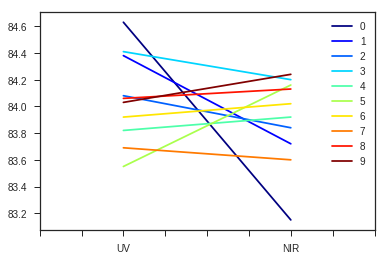

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = data.T.plot(colormap='jet', xlim = (-.5,1.5))